Banana


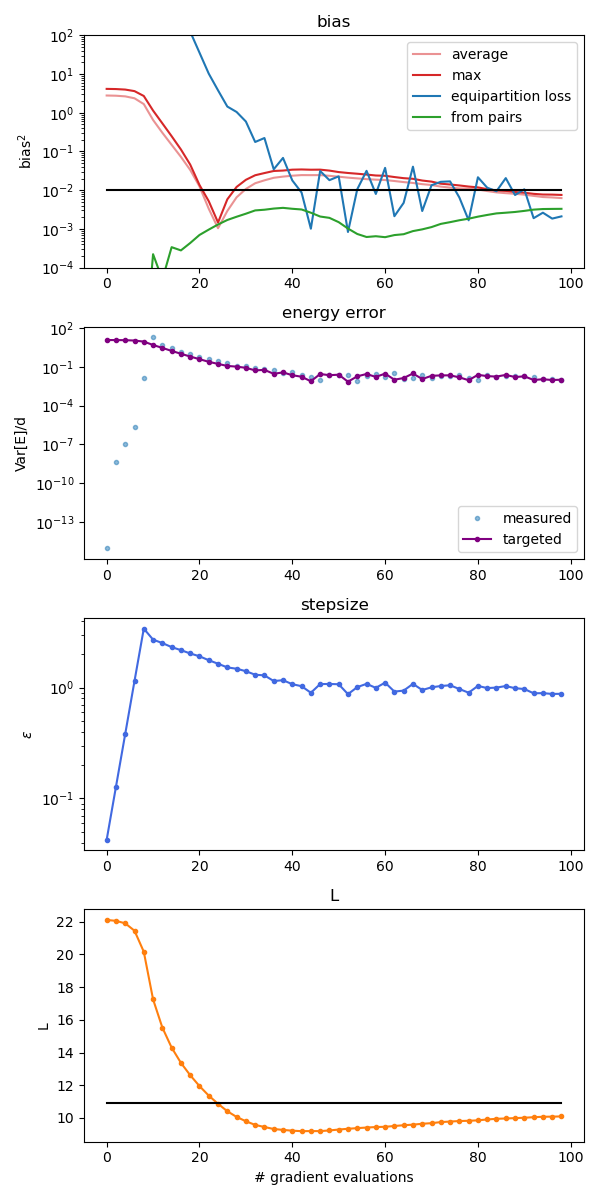

ICG


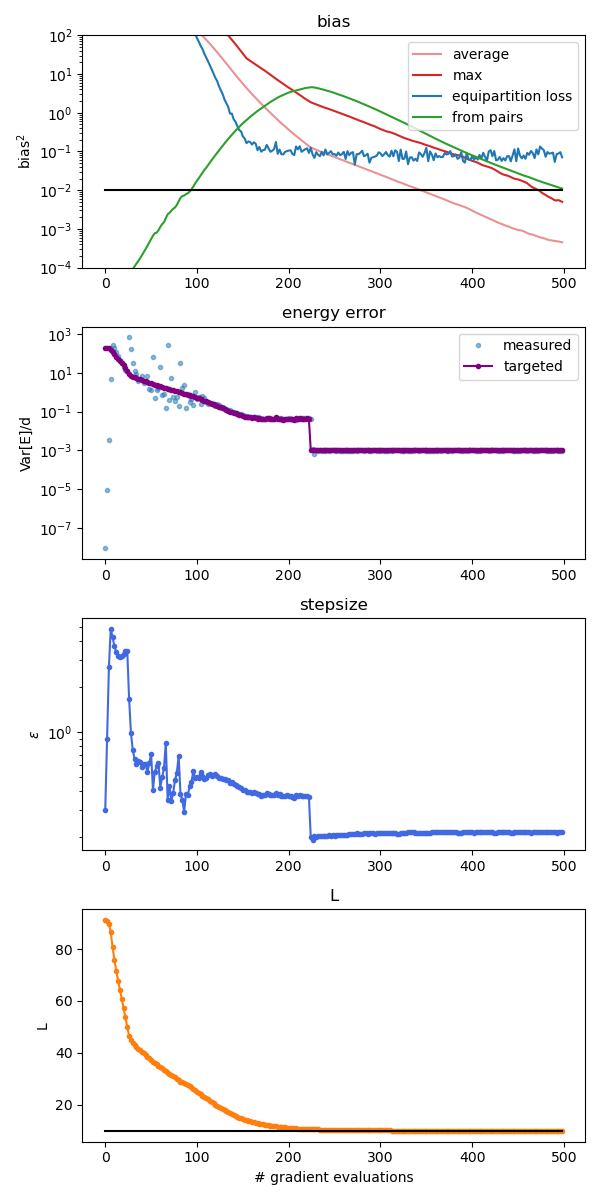

german_credit


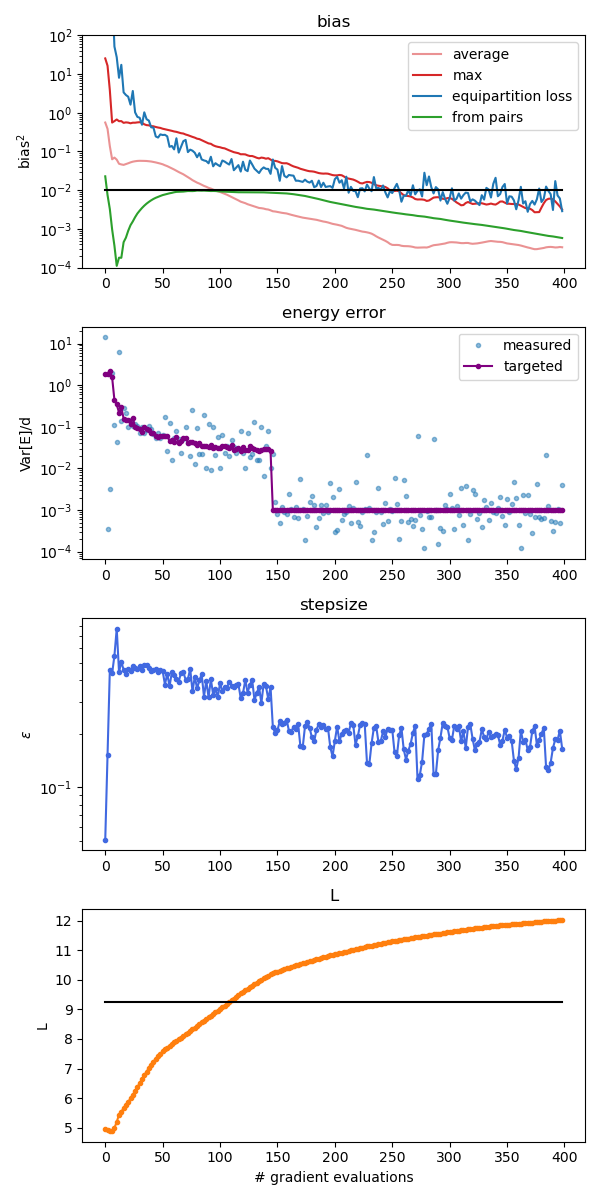

brownian


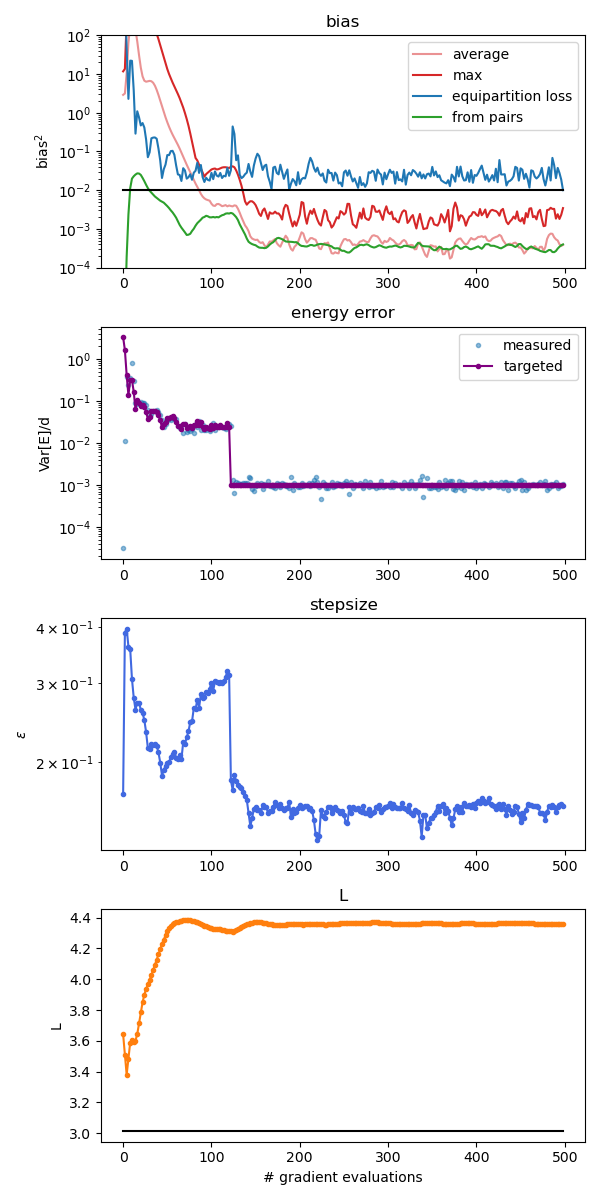

IRT


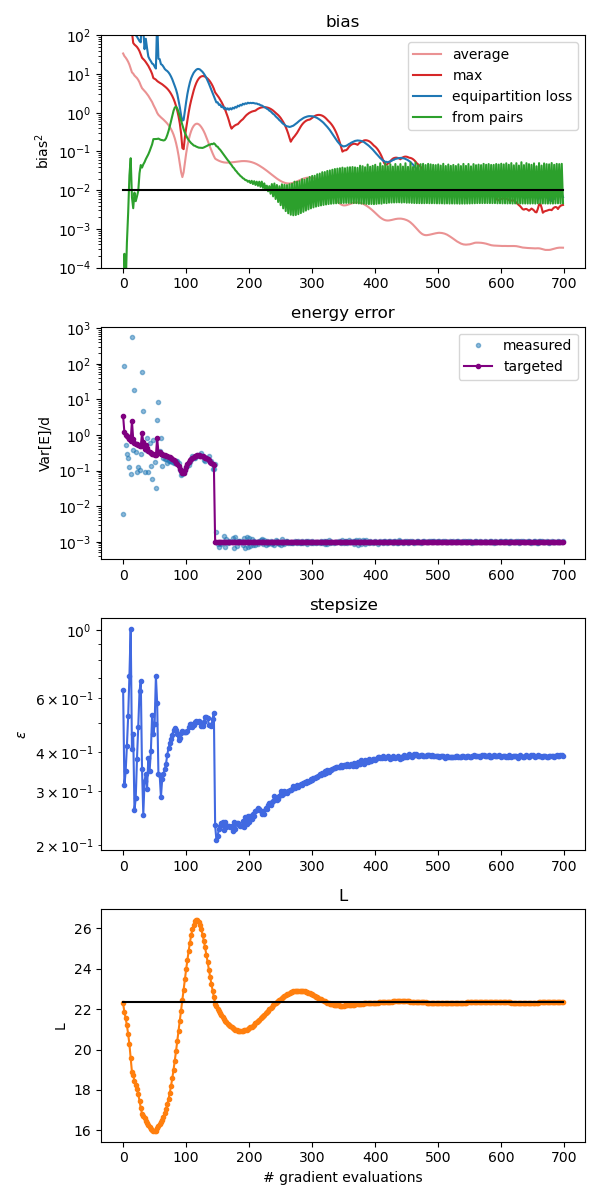

SV


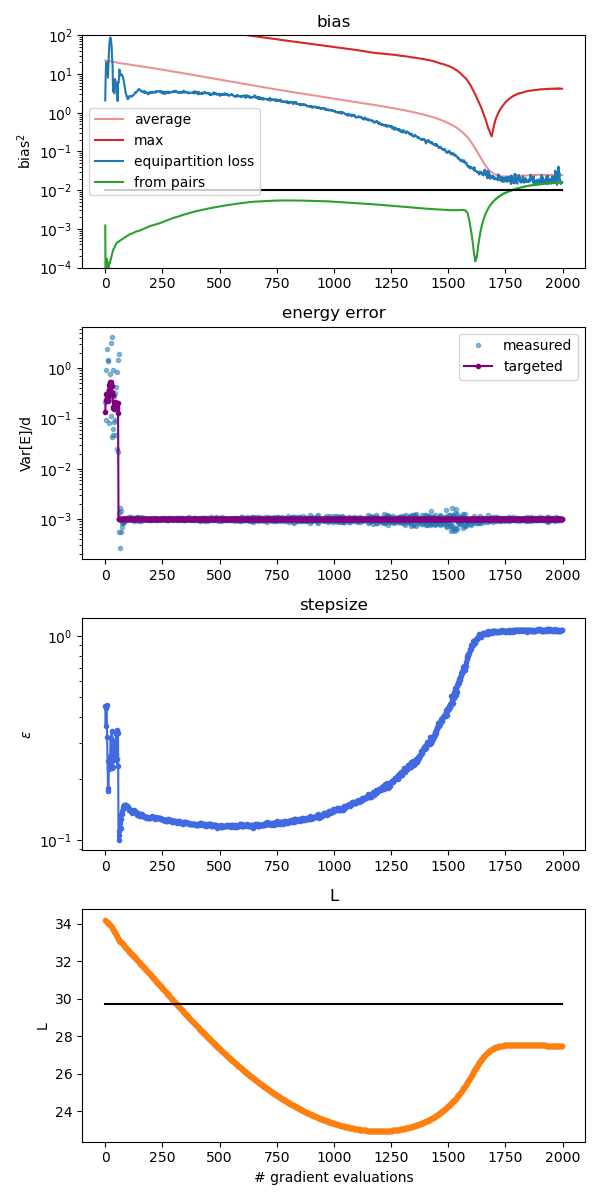

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display

targets = ['Banana', 'ICG', 'german_credit', 'brownian', 'IRT', 'SV']

for i in [0, 1, 2, 3, 4, 5]:
    name = targets[i]
    print(name)
    display(Image(filename='plots/tst_ensemble/'+name+'.png'))
    #ICG, Brownian, SV

(2048, 500, 32)


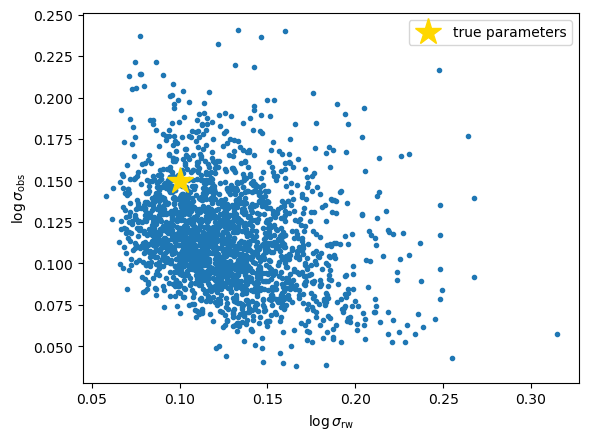

In [45]:
X = np.swapaxes(np.load('x.npy'), 0, 1)
print(X.shape)
x, y = X[:, :, 0], X[:, :, 1]

num = 1000
plt.plot(np.exp(x[:, -1]), np.exp(y[:, -1]), '.')
#plt.plot(x[num, 0], y[num, 0], 'o')

plt.plot(np.array([0.1, ]), np.array([0.15, ]), '*', color='gold', markersize=20, label = 'true parameters')
plt.legend()
plt.xlabel(r'$\log \sigma_{\mathrm{rw}}$')
plt.ylabel(r'$\log \sigma_{\mathrm{obs}}$')
plt.show()

6.754794764230141


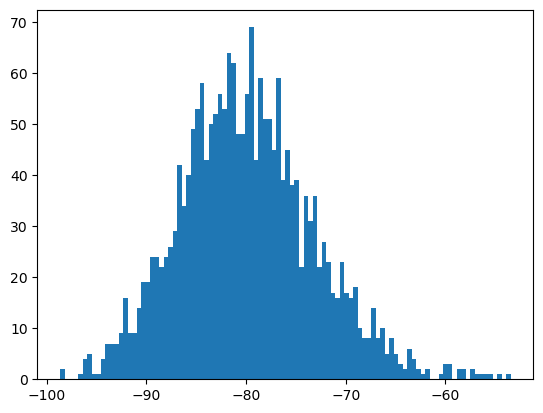

In [23]:
l = np.load('nlogp.npy')
print(np.std(l[-1]))
plt.hist(l[-1], bins = 100)
plt.show()